In [1]:
%autosave 1

Autosaving every 1 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
link="http://cs.joensuu.fi/sipu/datasets/jain.txt"
dataset=np.loadtxt(link)
features=np.array(dataset[:,0:2])
label=np.array(dataset[:,2])

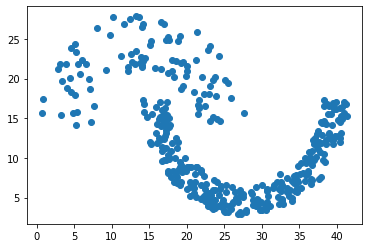

In [4]:
plt.scatter(features[:,0],features[:,1])
plt.show()

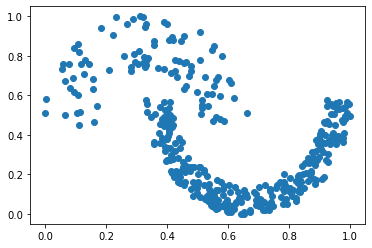

In [5]:
def min_max_scale(minimum, maximum, sample):
    return (sample-minimum)/(maximum-minimum)
def min_max_scaler(samples):
    minimum=samples.min(axis=0)
    maximum=np.max(samples, axis=0)
    new_sample=[]
    for sample in samples:
        new_sample.append(min_max_scale(minimum,maximum, sample))
    return np.array(new_sample)
features=min_max_scaler(features)
plt.scatter(features[:,0],features[:,1])
plt.show()

In [6]:
class k_means:
    def __init__(self):
        self.max_iter=300
    def distance(self,p1,p2):
        return np.sqrt(np.sum(np.power((np.subtract(p1,p2)),2)))
    def create_cluster(self,centroid):
        cluster=self.nearest_centroid(centroid)
        cluster_0=[]
        cluster_1=[]
        for index, points in enumerate(cluster):
            if points==0:
                cluster_0.append(index)
            if points==1:
                cluster_1.append(index)
        return np.array(cluster_0),np.array(cluster_1)
    def nearest_centroid(self,centroid):
        distance=[]
        for points in self.x:
            distance.append([self.distance(centroid[0],points),self.distance(centroid[1],points)])
        distance=np.array(distance)
        return np.argmin(distance, axis=1)
    def update_centroid(self,cluster_0,cluster_1):
        centroid=[]
        cluster0=[]
        cluster1=[]
        for idx in cluster_0:
            cluster0.append(self.x[idx])
        centroid.append(np.mean(np.array(cluster0),axis=0))
        for idx in cluster_1:
            cluster1.append(self.x[idx])
        centroid.append(np.mean(np.array(cluster1),axis=0))
        return np.array(centroid)
    def check_covergence(self,old_cent,centroid):
        if self.distance(old_cent,centroid)==0:
            return True
        else:
            return False
    def predict_cluster(self,x):
        self.x=x
        self.cent=[]
        for i in range (0,2):
            np.random.seed((i+1)*30)
            self.cent.append([np.random.random(2),np.random.random(2)])
        for iteration in range(self.max_iter):
            self.cluster_0,self.cluster_1=self.create_cluster(self.cent)
            old_cent=self.cent
            self.cent=self.update_centroid(self.cluster_0,self.cluster_1)
            if(self.check_covergence(old_cent,self.cent)):
                break
        label_predict=np.zeros(label.shape)
        for idx in self.cluster_0:
            label_predict[idx]=1
        for idx in self.cluster_1:
            label_predict[idx]=2
        cluster0=[]
        cluster1=[]
        for idx in self.cluster_0:
            cluster0.append([self.x[idx][0],self.x[idx][1]])
        for idx in self.cluster_1:
            cluster1.append([self.x[idx][0],self.x[idx][1]])
        return np.array(cluster0),np.array(cluster1),label_predict

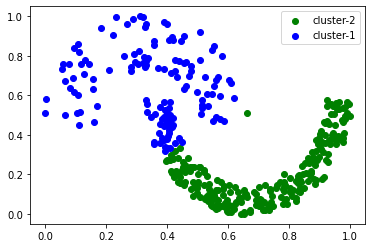

Accuracy for clustering is:88.20 %


In [7]:
Kmeans=k_means()
cluster0,cluster1,labels=Kmeans.predict_cluster(features)
plt.scatter(cluster0[:,0],cluster0[:,1],color='green')
plt.scatter(cluster1[:,0],cluster1[:,1],color='blue')
plt.legend(['cluster-2', 'cluster-1'])
plt.show()
accuracy=np.sum(labels==label)/len(label)
print("Accuracy for clustering is:%.2f"%(accuracy*100),"%")

In [8]:
x=features
x=(x-np.mean(x))/(0.01+np.var(x))
class Spectral:
    def __init__(self):
        pass
    def distance(self,p1,p2):
        return np.sqrt(np.sum(np.power((np.subtract(p1,p2)),2)))
    def laplacian(self,x):
        self.lap=[]
        for vec in x:
            row=[]
            for i in x:
                row.append(self.distance(vec,i))
            self.lap.append(row)
        return np.array(self.lap)
    def adjacency(self,lap):
        thresold=1
        self.adjus=[]
        for vec in lap:
            row=[]
            for i in vec:
                if i>thresold:
                    row.append(1)
                else:
                    row.append(0)
            self.adjus.append(row)
        return np.array(self.adjus)
    

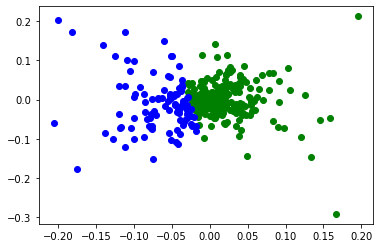

In [9]:
spec=Spectral()
#spec.laplacian(x)
lap=spec.laplacian(x)
adj=spec.adjacency(lap)
eign=adj-lap
eign_val,eign_vec=np.linalg.eig(eign)
eign_val=eign_val[np.argsort(eign_val)]
eign_vec=eign_vec[np.argsort(eign_val)]
new_feature=eign_vec[0:2]
kmeans=k_means()
cluster_0,cluster_1,labels=kmeans.predict_cluster(new_feature.T)
plt.scatter(cluster_0[:,0],cluster_0[:,1],color='green')
plt.scatter(cluster_1[:,0],cluster_1[:,1],color='blue')
plt.show()